### Линейная полиномиальная регрессия [Домашнее задание]

**Примечание:**

> Пожалуйста, не удаляйте комментарии или строки кода.

1. Пожалуйста, реализуйте функцию ```load_data(filename=None)```, которая будет загружать данные файла csv из ```filename``` и возвращать ```DataFrame```.

In [2]:
import pandas as pd

def load_data(filename=None):
    #Начало вашего кода
    if filename != None:
        data = pd.read_csv(filename)
        data.drop(columns=['Id'], inplace=True)
        return data
    else:
        return None
    #Конец вашего кода

num_data = load_data(filename="num_house_prices.csv")
num_data

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,60,7917,6,5,1999,2000,0.0,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1334,20,13175,6,6,1978,1988,119.0,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1335,70,9042,7,9,1941,2006,0.0,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1336,20,9717,5,6,1950,1996,0.0,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


### Ожидаемые результаты:

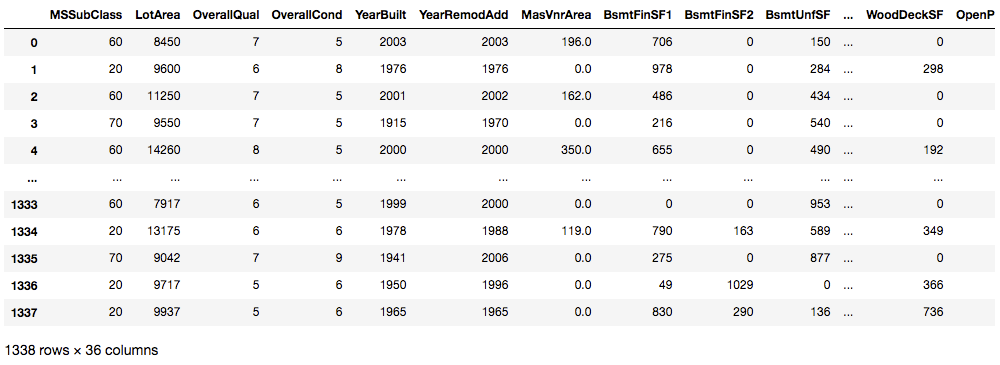

2. Пожалуйста, реализуйте функцию ```split_data(data, ratio=0.1)```, которая разбивает набор данных, загруженный в предыдущем вопросе, на наборы данных ```train``` и ```validation``` в соотношении 9:1.

In [4]:
import numpy as np

def split_data(data, ratio=0.1):
    np.random.seed(1)
    #Начало вашего кода    
    indeces = np.arange(0, len(data))
    np.random.shuffle(indeces)
    val_indeces = indeces[:round(ratio*len(data))]
    train_indeces = indeces[round(ratio*len(data)):]
    val_data = data.loc[val_indeces]
    train_data = data.loc[train_indeces]
    #Конец вашего кода
    return {"validation":val_data, "train":train_data}

splitted_data = split_data(num_data, ratio=0.1)

In [5]:
splitted_data["validation"].head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
559,20,7943,4,5,1961,1961,192.0,903,0,126,...,64,0,39,0,0,0,0,4,2007,118500
1087,60,8935,7,5,2002,2002,95.0,0,0,831,...,144,68,0,0,0,0,0,7,2009,195000
1020,20,12085,8,5,2007,2007,328.0,1004,0,730,...,0,0,0,0,0,0,0,11,2007,318000
460,60,9803,7,5,2005,2005,0.0,400,0,466,...,0,108,0,0,0,0,0,2,2008,226700
802,20,8892,5,7,1953,1996,0.0,0,0,105,...,196,0,150,0,0,0,0,10,2008,116000


### Ожидаемые результаты:

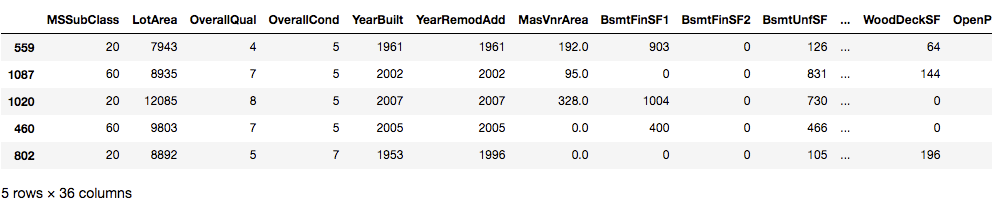

In [6]:
splitted_data["train"].head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
355,60,12474,10,5,2007,2008,272.0,1280,0,402,...,196,134,0,0,0,0,0,8,2008,426000
1316,20,8400,6,9,1962,2005,237.0,0,0,1319,...,0,36,0,0,0,0,0,7,2008,174000
133,30,6120,5,7,1931,1993,0.0,209,0,506,...,48,0,0,0,0,0,0,11,2009,105000
181,20,10125,6,6,1977,1977,0.0,641,279,276,...,238,83,0,0,0,0,0,2,2008,171500
1133,20,9037,8,5,2006,2006,32.0,428,0,1048,...,120,33,0,0,0,0,0,12,2007,265900


### Ожидаемые результаты:

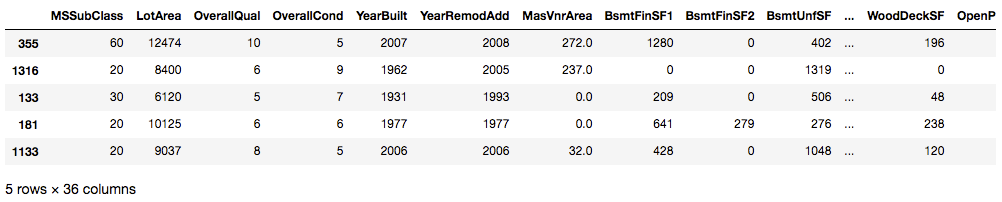

3. Пожалуйста, визуализируйте коэффициенты корреляции для набора данных ```train```.

Примечание: ```figsize=(10,8)```

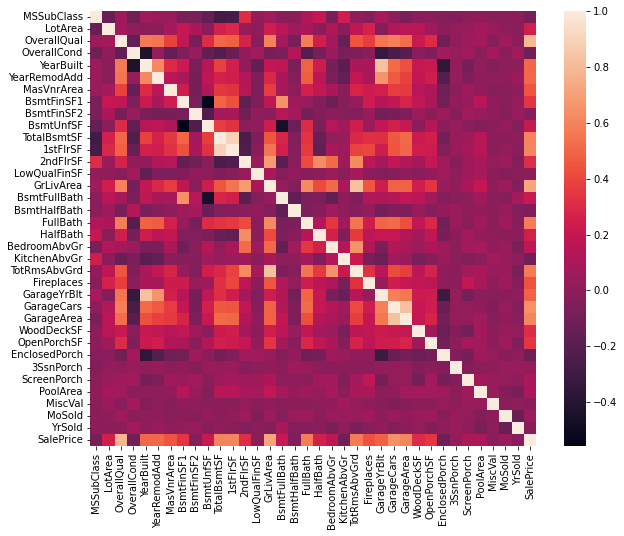

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#Начало вашего кода 
plt.rcParams['figure.figsize'] = (10, 8)
sns.heatmap(splitted_data['train'].corr());
#Конец вашего кода

### Ожидаемые результаты:

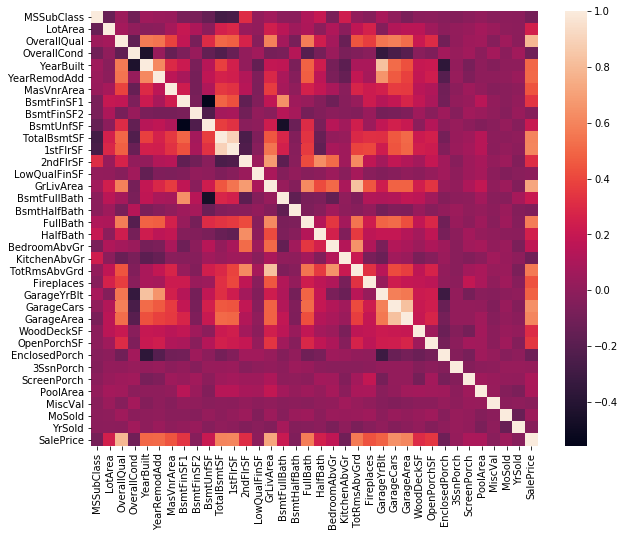

4. Теперь выберите топ 9 наиболее коррелированных параметров с ```"SalePrice"``` и назначьте результаты списку ```important```. Теперь визуализируйте коэффициенты корреляции этих параметров (переменных).

    Примечание: ```figsize=(8,8)```

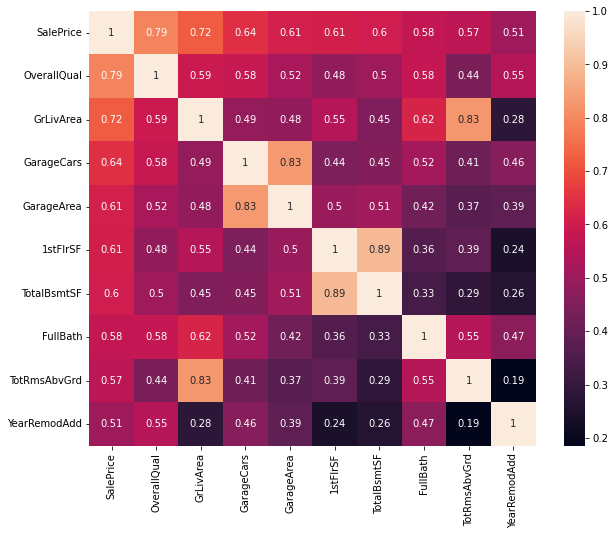

In [19]:
#Начало вашего кода 
important = splitted_data['train'].corr()['SalePrice'].sort_values(ascending=False)[:10].index
sns.heatmap(splitted_data['train'][important].corr(), annot=True);
#Конец вашего кода


### Ожидаемые результаты:


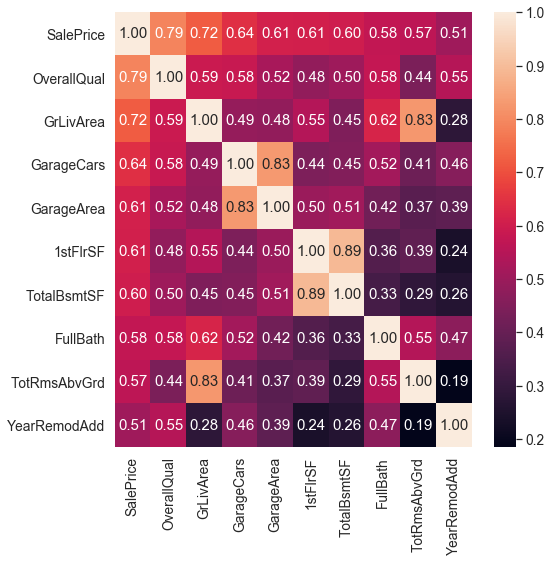

5. Теперь пришло время использовать модель линейной **полиномиальной** регрессии для параметров в списке ```important``` для прогнозирования ```SalePrice```. Пожалуйста, реализуйте функцию ```train_lin_poly_regressors(data, parameters, target="SalePrice", degree=1)```, которая будет обучать модель линейной **полиномиальной** регрессии в степени ```degree``` для ```n``` параметров из списка ```parameters```. Функция должна возвращать обученные модели линейной **полиномиальной** регрессии для каждого элемента списка ```parameters```.

In [ ]:
#Начало вашего кода 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
 
def train_lin_poly_regressors(data, parameters, target='SalePrice', degree=1):
    for col in parameters[1:]:
        feature_generator = PolynomialFeatures(degree)
        pol2_features = feature_generator.fit_transform(np.reshape(data[col].values,(-1, 1)))
        pol2_regressor = LinearRegression()
        pol2_regressor.fit(pol2_features, np.reshape(data[target].values() ,(-1,1)))
#Конец вашего кода

lin_poly_regressors = train_lin_poly_regressors(splitted_data["train"], important, target="SalePrice")
print(lin_poly_regressors)

6. Спрогнозируйте ```"SalePrice"``` для набора данных ```validation``` с использованием обученной модели множественной линейной регрессии. Пожалуйста, реализуйте функцию ```validation(regressors, data, target="SalePrice")```, которая будет принимать обученную модель множественной линейной регрессии ```regressor```, данные ```validation``` и параметр ```target```, который должен быть предсказан. Функция должна возвращать ```DataFrame``` с первым столбцом, который будет истинным ```"SalePrice"```,  а второй столбцец предсказан моделью множественной линейной регрессии.

In [ ]:
splitted_data["validation"]

In [ ]:
#Начало вашего кода


#Конец вашего кода

pd_predictions = validation(lin_poly_regressors, splitted_data["validation"], target="SalePrice")
pd_predictions

### Ожидаемые результаты:

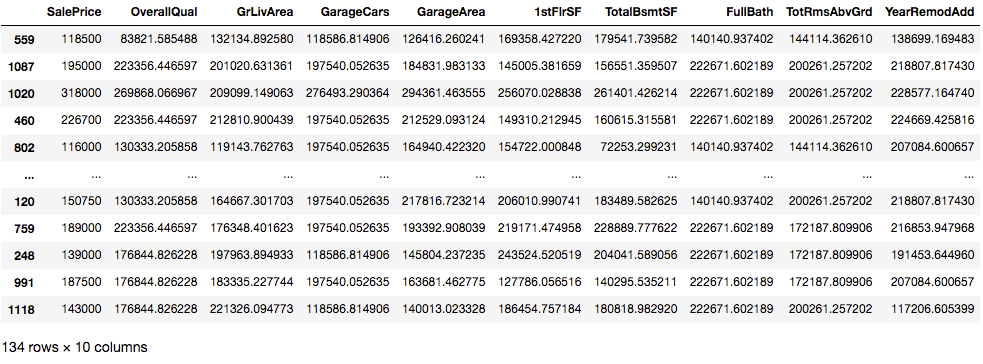

8. Постройте графики 3х3, где ось X - это истинные значения ```"SalePrice"```, а ось Y - ваши прогнозы.

In [ ]:
#Начало вашего кода 

#Конец вашего кода

plot_comparison(pd_predictions)

### Ожидаемые результаты:

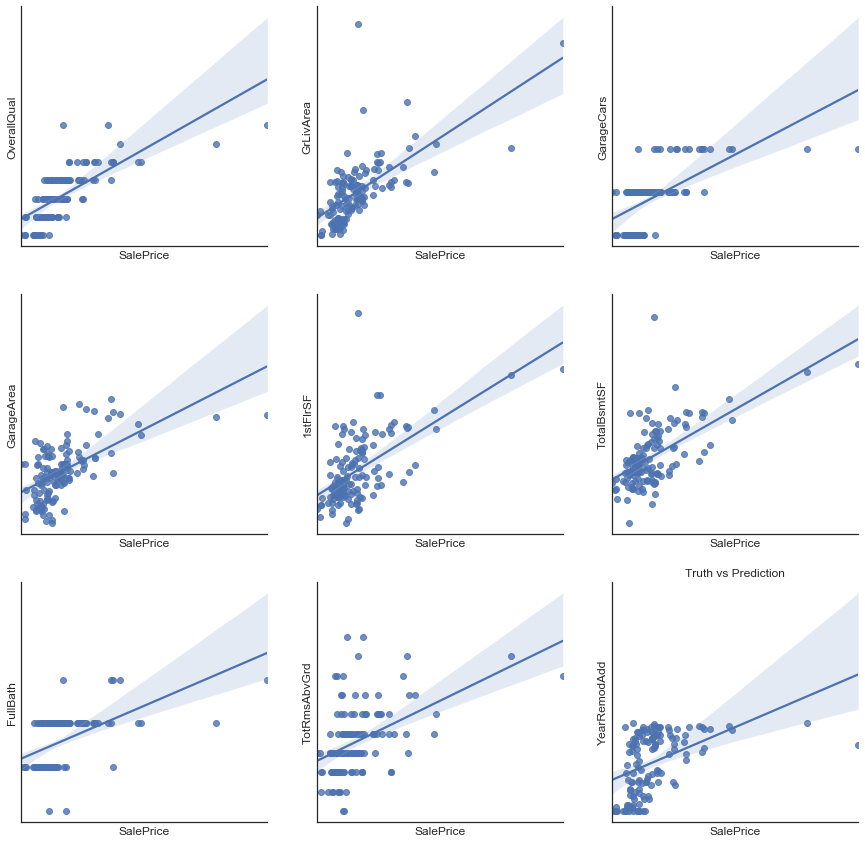

9. В задаче 5 мы обучили модели линейной полиномиальной регрессии степени 1 (то же самое что и простая линейная регрессия) для 9 самых коррелированных столбцов с «SalePrice». Теперь давайте попробуем степени по выше, такие как степени 2, 3, и 10.

In [ ]:
print("линейная полиномиальная регрессия степени 2")
#Начало вашего кода

#Конец вашего кода

### Ожидаемые результаты:
```
линейная полиномиальная регрессия степени 2
```

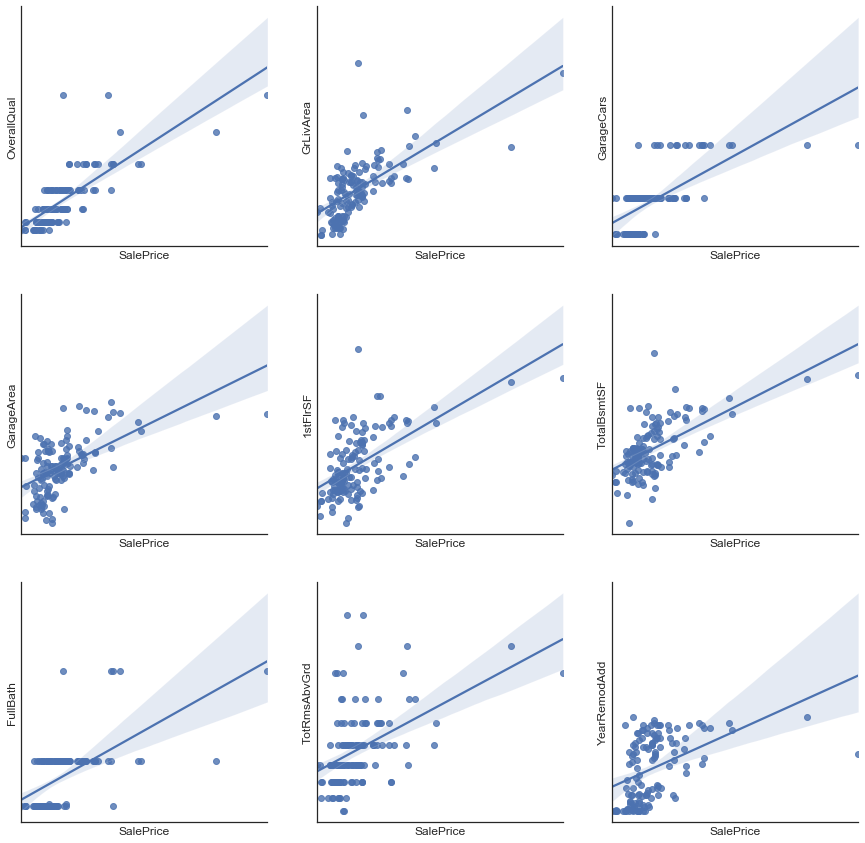


In [ ]:
print("линейная полиномиальная регрессия степени 3")
#Начало вашего кода

#Конец вашего кода

### Ожидаемые результаты:
```
линейная полиномиальная регрессия степени 3
```

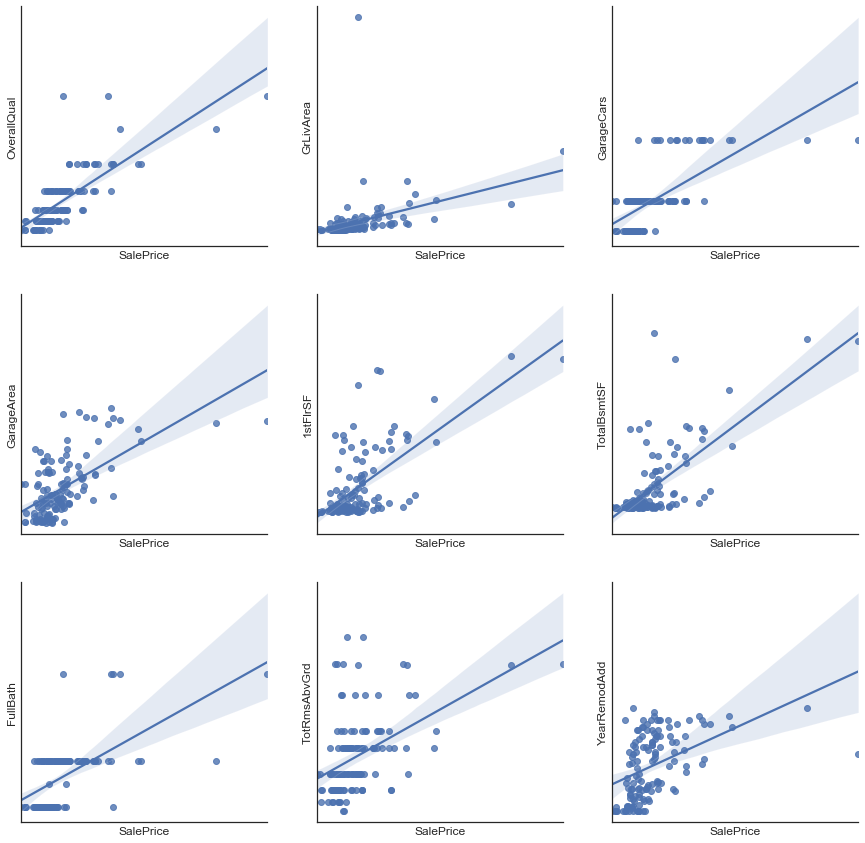


In [ ]:
print("линейная полиномиальная регрессия степени 10")
#Начало вашего кода

#Конец вашего кода

### Ожидаемые результаты:
```
линейная полиномиальная регрессия степени 2
```

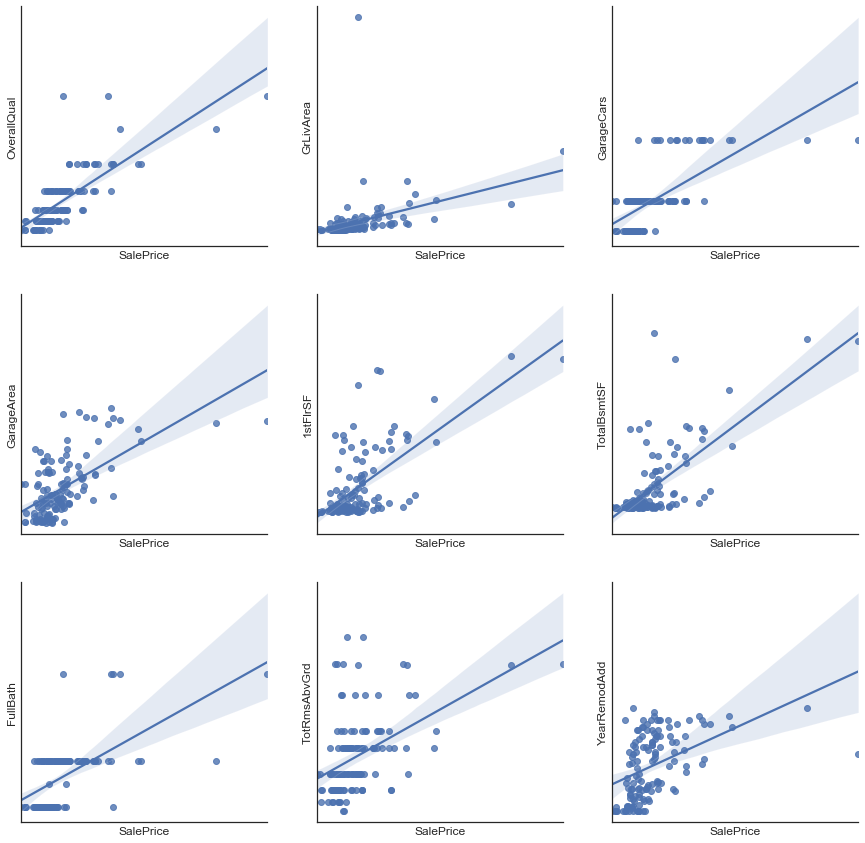


10. Пожалуйста, сделайте больше анализа прогнозов, улучшает ли результаты линейная полиномиальная регрессия?

In [ ]:
#Начало вашего кода 

#Конец вашего кода

### Отличная работа